In [1]:
import numpy as np
import pandas as pd
import scipy.signal
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_list = ['/home/charles/ECG-Manlio/training data/' + str(i) + '.txt' for i in range(1,31)]

In [3]:
def read_ECG_from_txt(files):
    n = len(files)
    ecg_info = []
    ecg_signals = np.zeros((n, 12, 5000))
    k = 0 #count file number
    for filename in files:
        with open(filename) as f:
            lines = [line.rstrip('\n') for line in f]
            ecg_info.append(lines[:20])
            ecg_signals[k, :, :].flat[:] = lines[20:]
        k = k + 1
    return ecg_info, ecg_signals

In [4]:
ecg_info, ecg_signals = read_ECG_from_txt(file_list)

In [5]:
ecg_signals = np.delete(ecg_signals, [2,3,4,5], 1)

In [6]:
ecg_signals.shape

(30, 8, 5000)

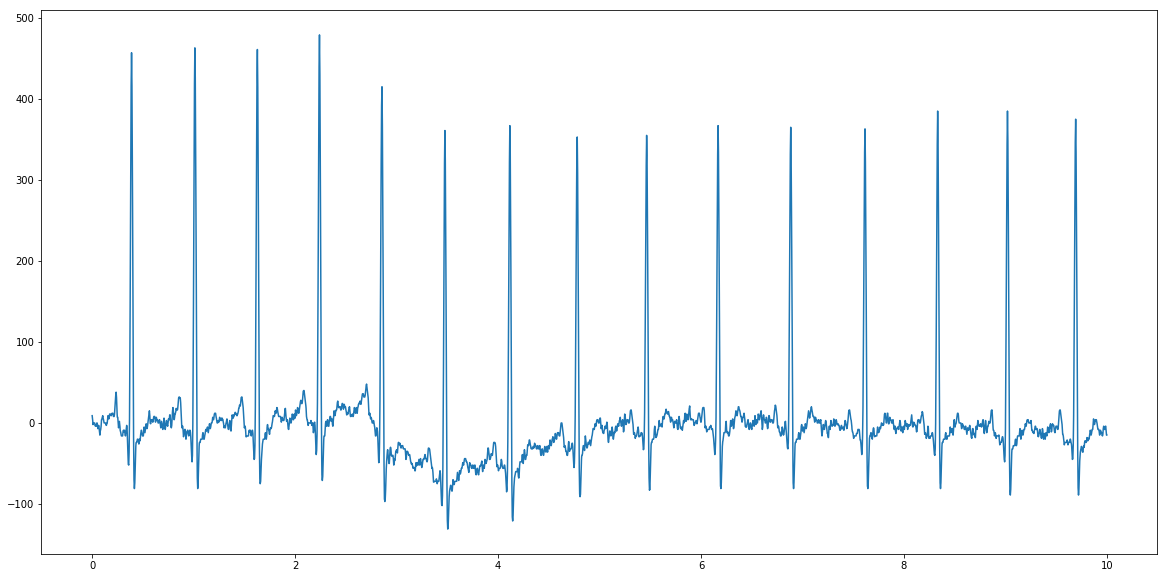

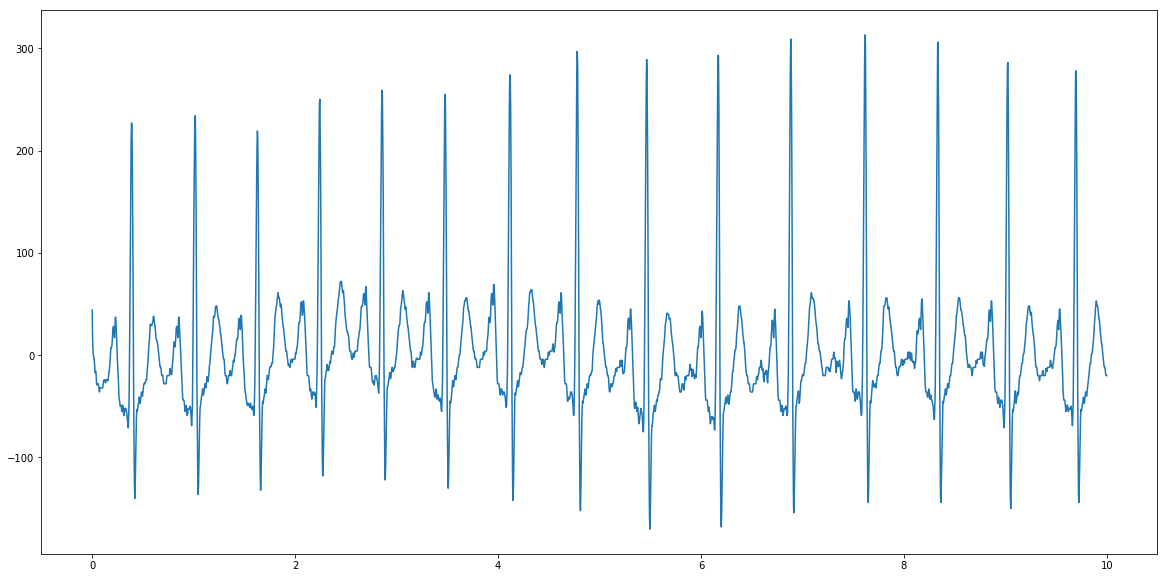

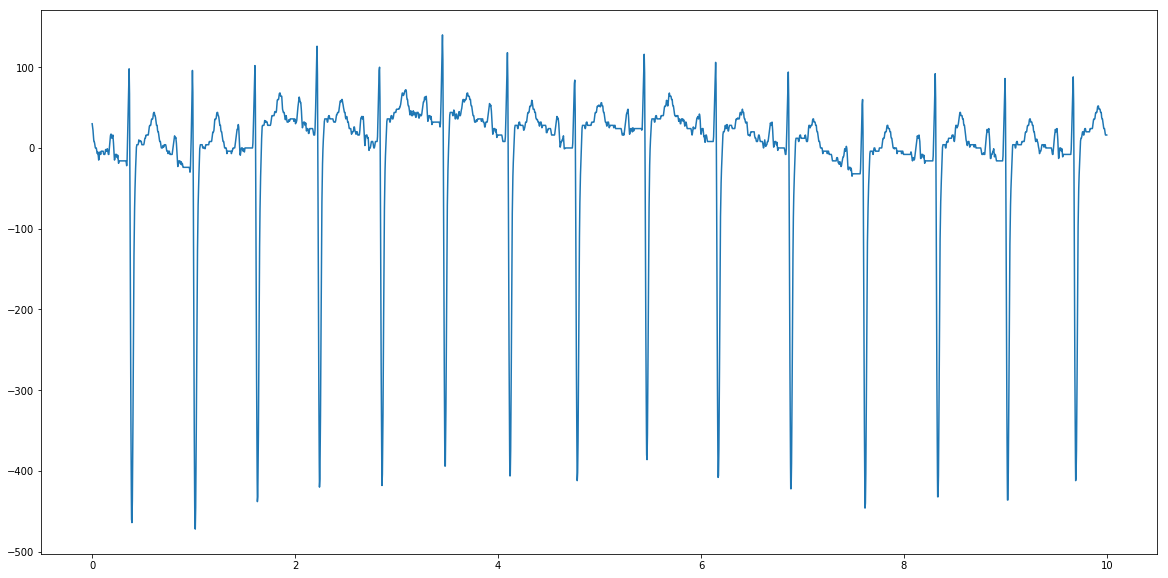

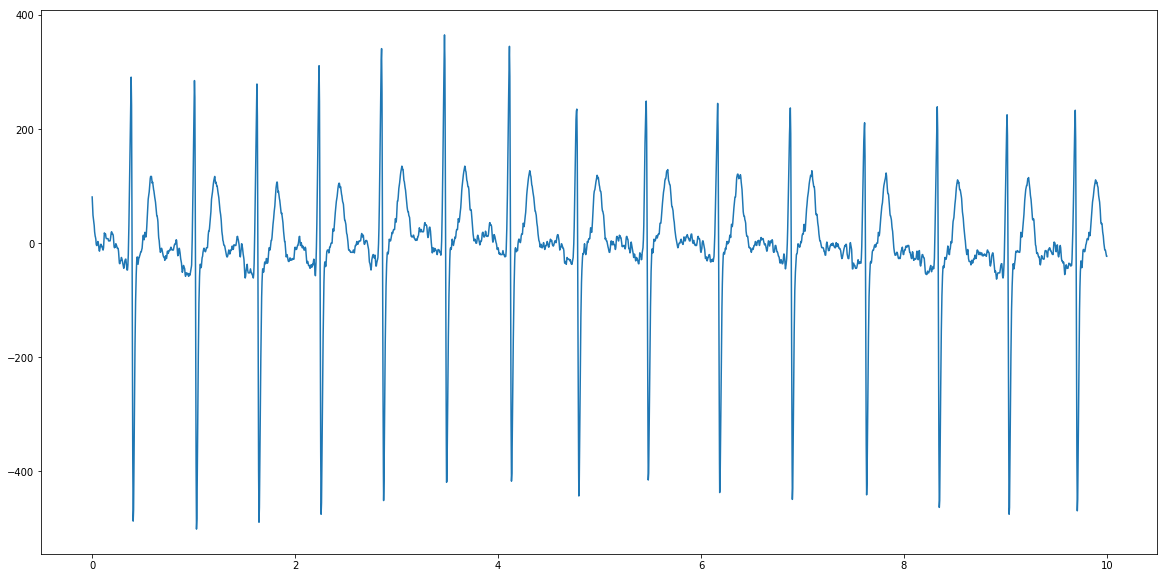

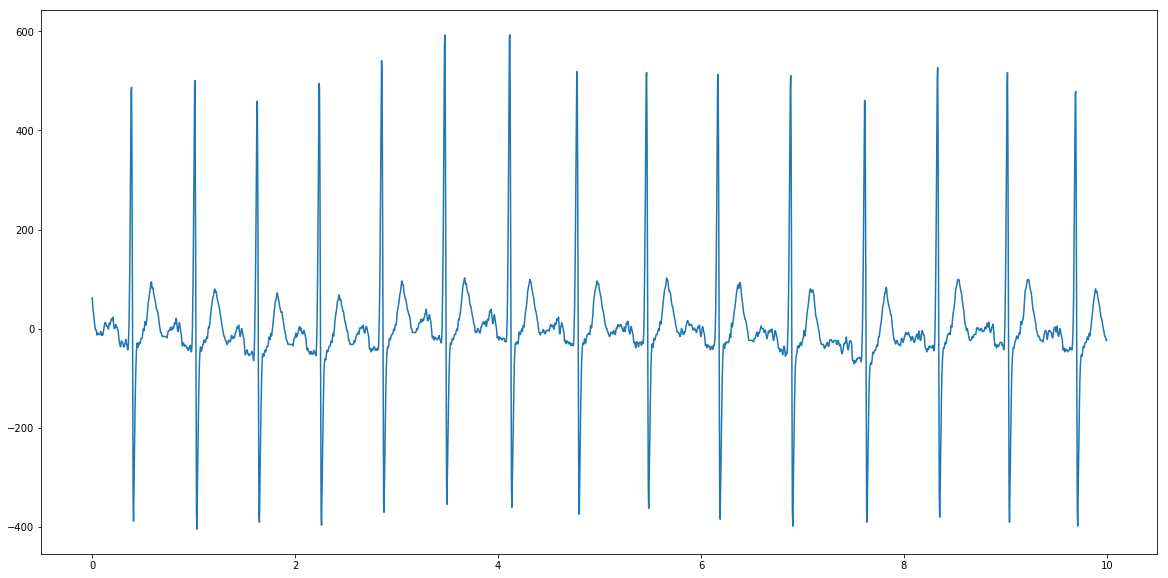

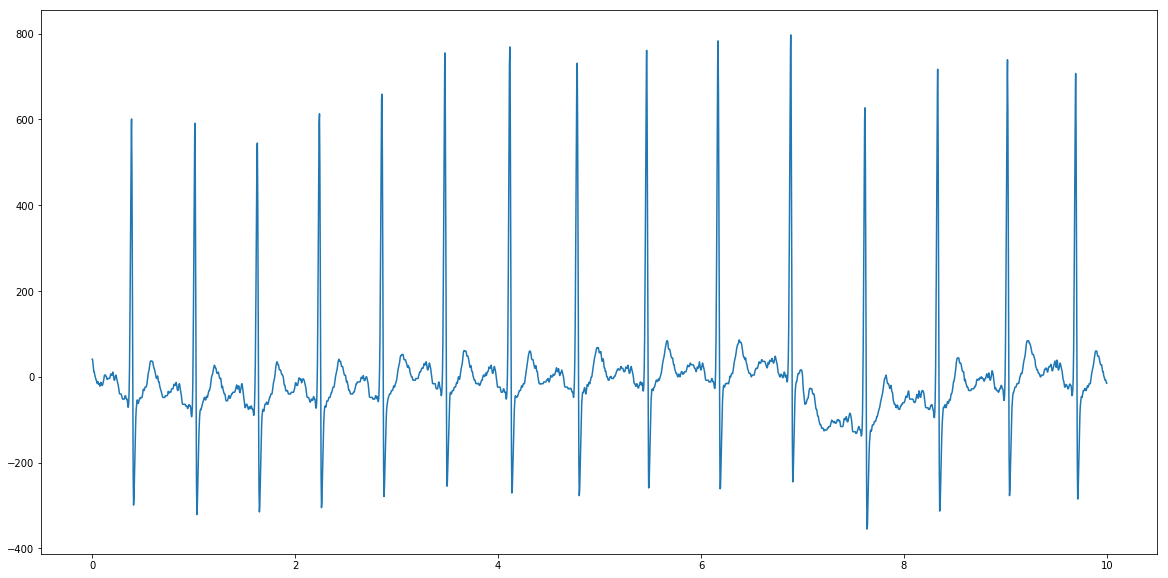

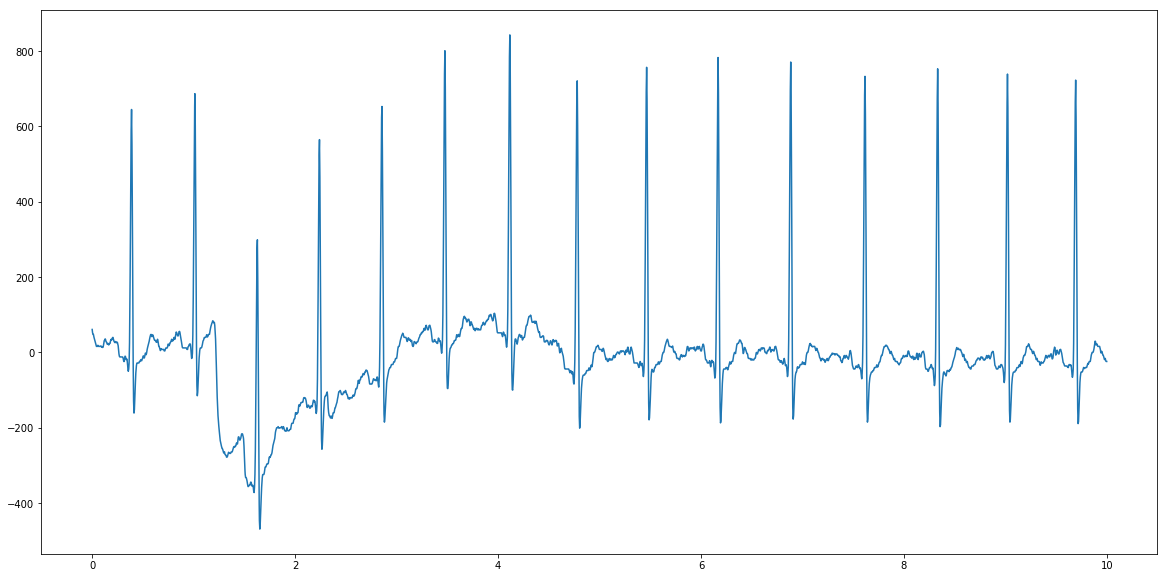

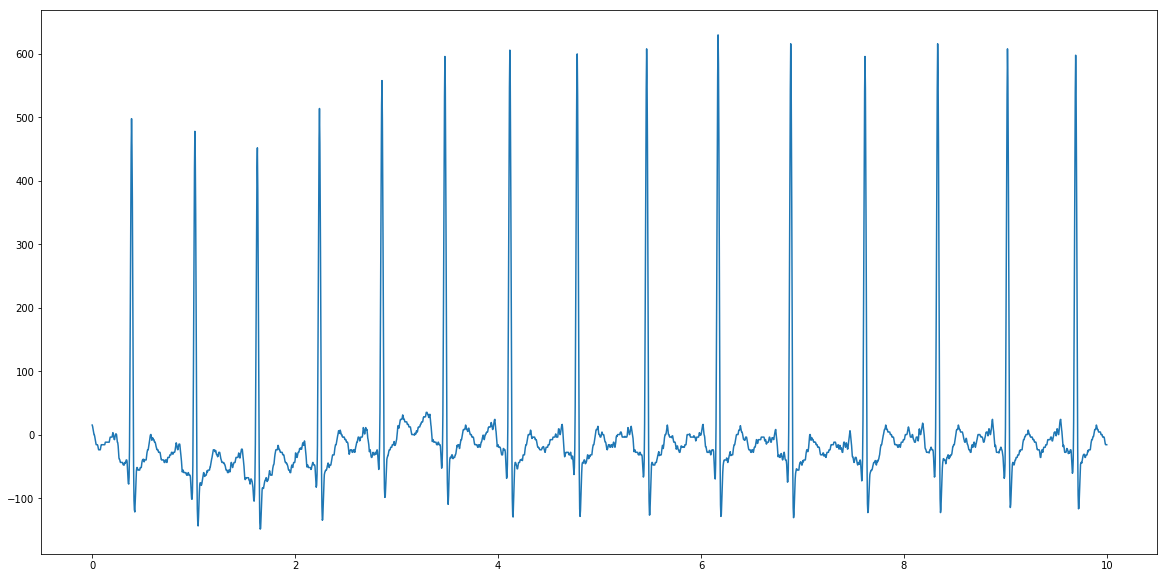

In [7]:
t = np.array(range(5000))*0.002
for j in range(8):
    plt.figure(figsize=[20,10])
    plt.plot(t, ecg_signals[0, j, :])
    plt.show()

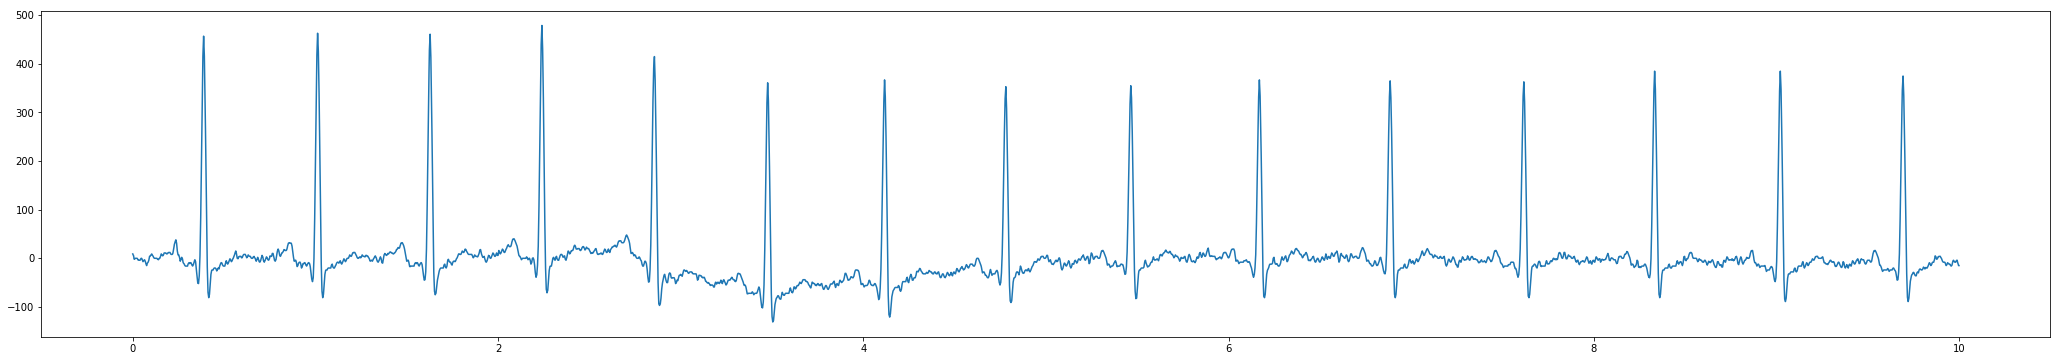

In [8]:
fig = plt.figure(figsize=[36,6])
plt.plot(t, ecg_signals[0,0,:])
plt.show()

(array([  17.,  152.,  535., 1441., 2452.,  152.,   24.,   14.,   17.,
          20.,   13.,   21.,   19.,   22.,   19.,   35.,   22.,    8.,
          11.,    6.]),
 array([-131. , -100.5,  -70. ,  -39.5,   -9. ,   21.5,   52. ,   82.5,
         113. ,  143.5,  174. ,  204.5,  235. ,  265.5,  296. ,  326.5,
         357. ,  387.5,  418. ,  448.5,  479. ]),
 <a list of 20 Patch objects>)

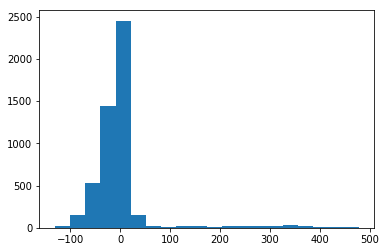

In [9]:
plt.hist(ecg_signals[0,0,:], bins=20)

In [10]:
scipy.signal.find_peaks(ecg_signals[0,0,:], height=100)

(array([ 194,  506,  814, 1120, 1428, 1738, 2058, 2390, 2732, 3084, 3442,
        3808, 4166, 4510, 4846]),
 {'peak_heights': array([457., 463., 461., 479., 415., 361., 367., 353., 355., 367., 365.,
         363., 385., 385., 375.])})

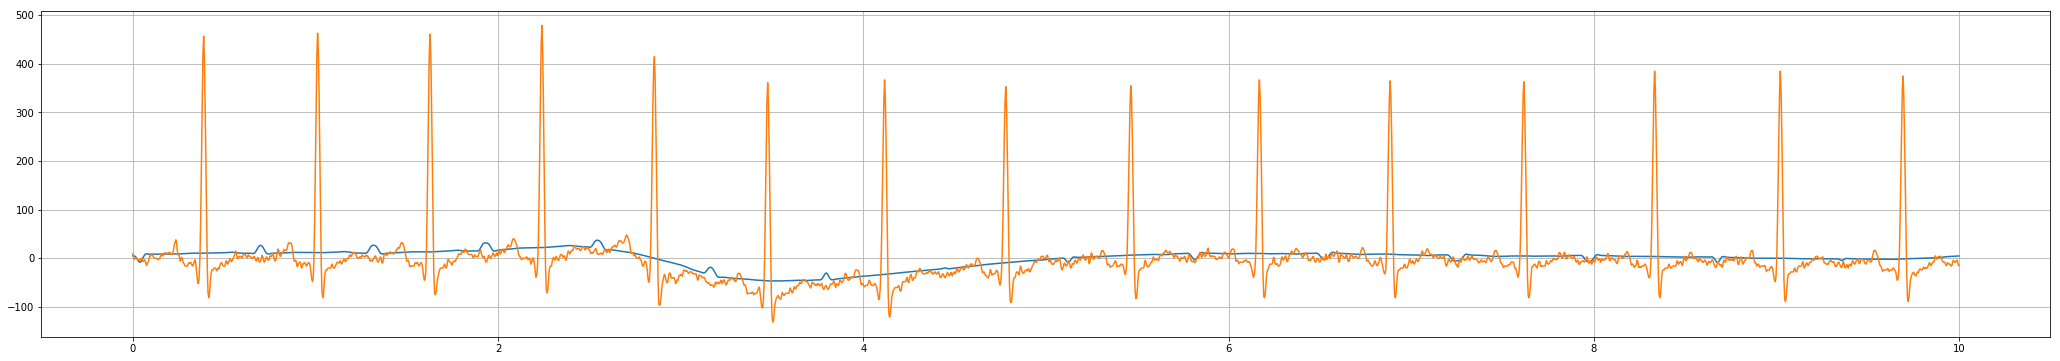

In [11]:
sg = scipy.signal.savgol_filter(ecg_signals[0,0,:], 333, 1, mode='wrap')
plt.figure(figsize=[36,6])
plt.plot(t, sg)
plt.plot(t, ecg_signals[0,0,:])
#plt.plot(t, ecg_signals[0,0,:] - sg)
plt.grid()

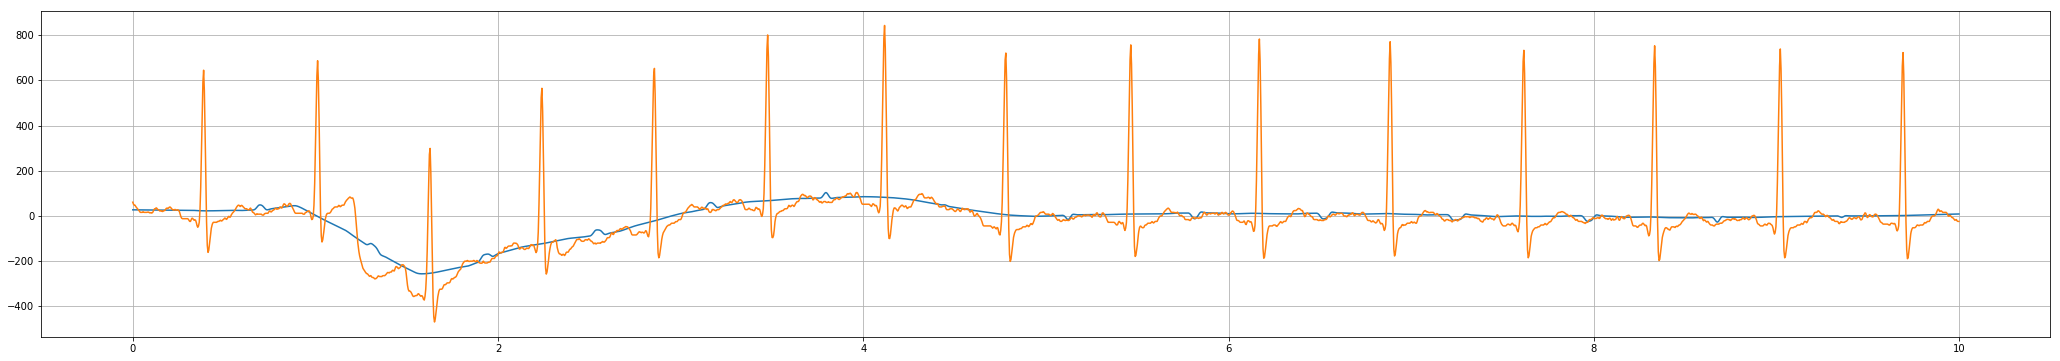

In [12]:
sg = scipy.signal.savgol_filter(ecg_signals[0,6,:], 333, 1)
plt.figure(figsize=[36,6])
plt.plot(t, sg)
plt.plot(t, ecg_signals[0,6,:])
#plt.plot(t, ecg_signals[0,6,:] - sg)
plt.grid()

In [13]:
m = np.median(ecg_signals[0,0,:])
new_ecg_signals = ecg_signals[0,0,:] - m
p = np.polyfit(t, new_ecg_signals, 4)
poly4 = np.polyval(p, t)
new_ecg_signals = new_ecg_signals - poly4

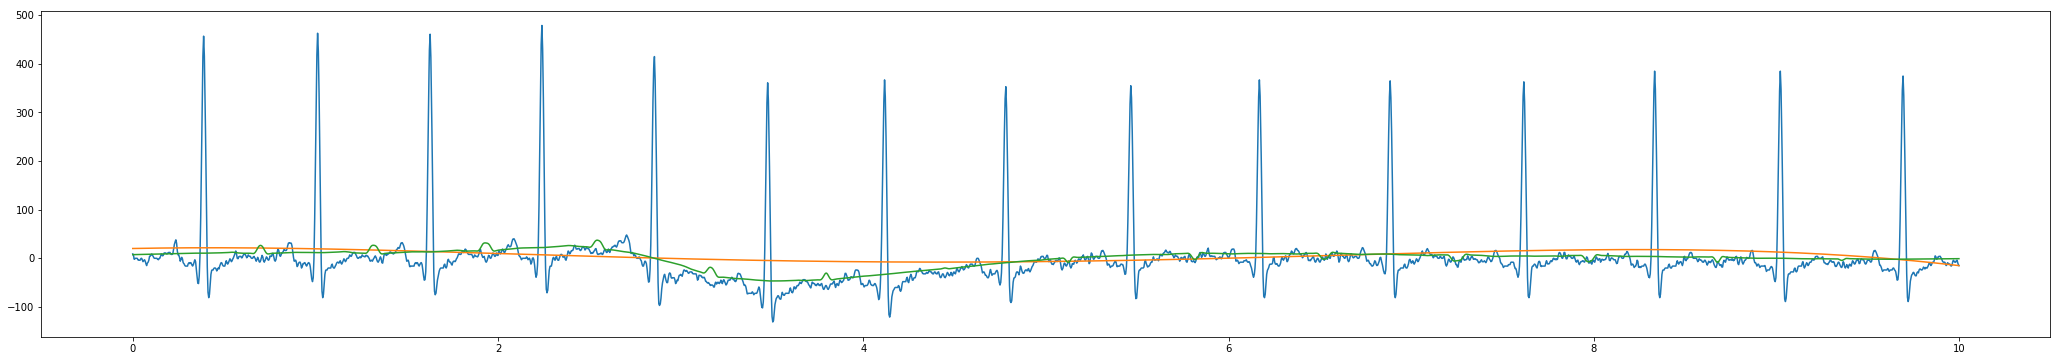

In [14]:
plt.figure(figsize=[36,6])
plt.plot(t, ecg_signals[0,0,:])
plt.plot(t, poly4)
sg4 = scipy.signal.savgol_filter(ecg_signals[0,0,:], 333, 1)
plt.plot(t, sg4)

In [67]:
def high_pass_filter(signal, order, cutoff, fs):
    nyq = 0.5 * fs
    normal_cutoff = cutoff/nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high')
    filtered_signal = scipy.signal.filtfilt(b, a, signal)
    return filtered_signal

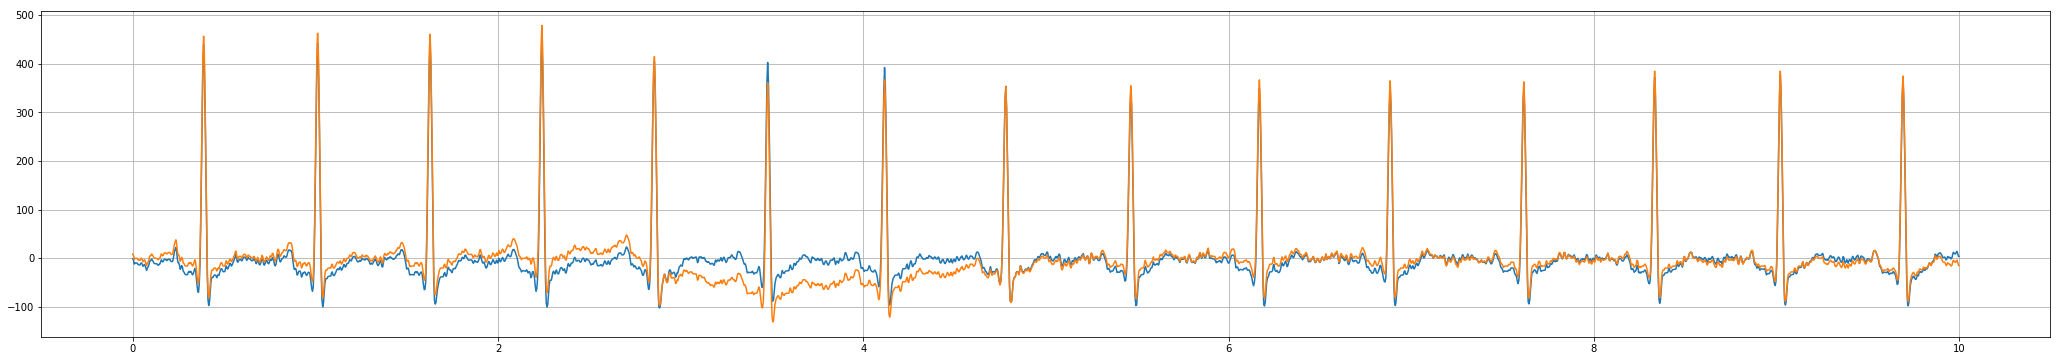

In [83]:
filtered = high_pass_filter(ecg_signals[0,0,:], 5, 1.5, 500)
plt.figure(figsize=[36,6])
plt.plot(t, filtered)
plt.plot(t, ecg_signals[0,0,:])
plt.grid()
plt.show()

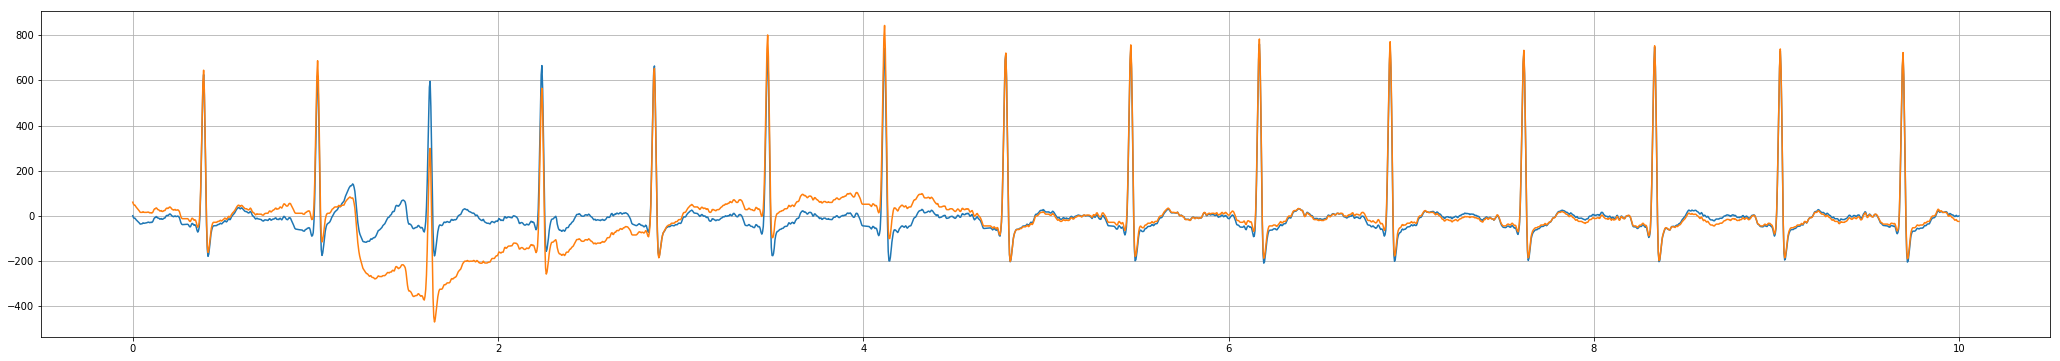

In [85]:
filtered = high_pass_filter(ecg_signals[0,6,:], 5, 1.5, 500)
plt.figure(figsize=[36,6])
plt.plot(t, filtered)
plt.plot(t, ecg_signals[0,6,:])
plt.grid()
plt.show()

In [88]:
ecg_info[0][16]

'400'

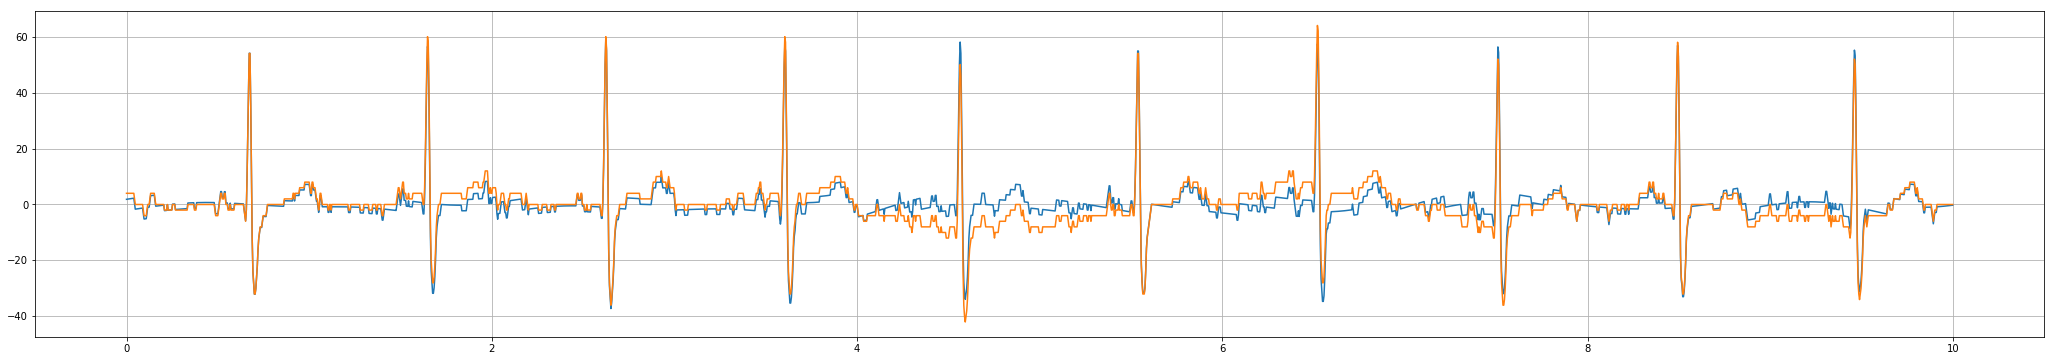

In [87]:
filtered = high_pass_filter(ecg_signals[20,0,:], 5, 1, 500)
plt.figure(figsize=[36,6])
plt.plot(t, filtered)
plt.plot(t, ecg_signals[20,0,:])
plt.grid()
plt.show()

In [89]:
ecg_info[20][16]

'200'

In [115]:
filtered_ecg_signals = np.zeros((30, 8, 5000))
n1 = np.zeros((30))

for i in range(30):
    n_peaks = []
    for j in range(8):
        filtered_signal = high_pass_filter(ecg_signals[i,j,:],5,1,500)
        m = filtered_signal.max() * 0.5
        peaks, _ = scipy.signal.find_peaks(filtered_signal, height=m)
        n_peaks.append(len(peaks))
    n1[i] = scipy.stats.mode(n_peaks)[0][0]
    for k in range(8):
        filtered_ecg_signals[i,k,:] = high_pass_filter(ecg_signals[i,k,:], 5, n1[i]/10, 500)

In [116]:
n1

array([15., 12., 11., 10., 12., 11., 13., 10., 11., 13.,  9.,  9., 11.,
       11., 10.,  6., 11., 11.,  9., 11., 10., 11., 10., 12., 11., 12.,
       11., 12., 14., 10.])

In [118]:
filtered_ecg_signals = np.zeros((30, 8, 5000))
n2 = np.zeros((30))

for i in range(30):
    n_peaks = []
    for j in range(8):
        filtered_signal = high_pass_filter(ecg_signals[i,j,:],5,1,500)
        m = filtered_signal.max() * 0.75
        peaks, _ = scipy.signal.find_peaks(filtered_signal, height=m)
        n_peaks.append(len(peaks))
    n2[i] = scipy.stats.mode(n_peaks)[0][0]
    for k in range(8):
        filtered_ecg_signals[i,k,:] = high_pass_filter(ecg_signals[i,k,:], 5, n2[i]/10, 500)

In [119]:
n2

array([15., 12., 11., 10., 12., 11., 13., 10., 11.,  1.,  9., 10., 11.,
       11., 10.,  5., 11., 11.,  9., 11., 10., 11., 10., 12., 11., 12.,
       11., 12., 14., 10.])

In [137]:
filtered_ecg_signals = np.zeros((30, 8, 5000))
n3 = np.zeros((30))
autocorr_signal = np.zeros((30,8,9999))

for i in range(30):
    n_peaks = []
    for j in range(8):
        filtered_signal = high_pass_filter(ecg_signals[i,j,:],5,1,500)
        if abs(filtered_signal.min()) > filtered_signal.max():
            filtered_signal = - 1 * filtered_signal
        m = filtered_signal.max() * 0.5
        peaks, _ = scipy.signal.find_peaks(filtered_signal, height=m)
        n_peaks.append(len(peaks))
    n3[i] = scipy.stats.mode(n_peaks)[0][0]
    for k in range(8):
        filtered_ecg_signals[i,k,:] = high_pass_filter(ecg_signals[i,k,:], 5, n3[i]/10, 500)
        autocorr_signal[i,k,:] = autocorr(filtered_ecg_signals[i,k,:])

In [135]:
n3

array([15., 12., 11., 10., 12., 11., 13., 10., 11., 13.,  9.,  9., 11.,
       11., 10., 15., 11., 11.,  9., 11., 10., 11., 10., 12., 11., 12.,
       11., 12., 14., 10.])

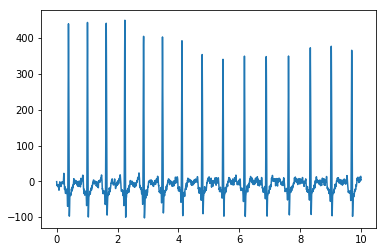

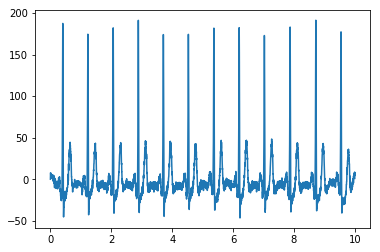

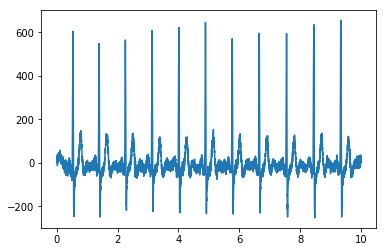

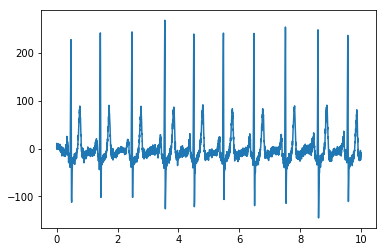

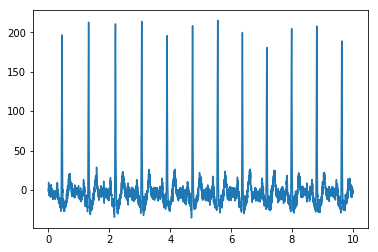

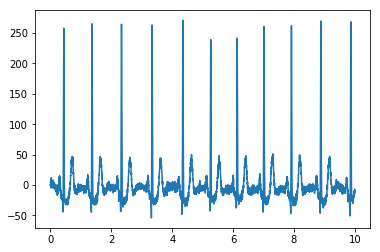

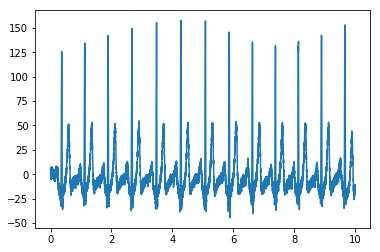

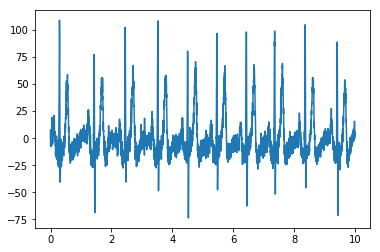

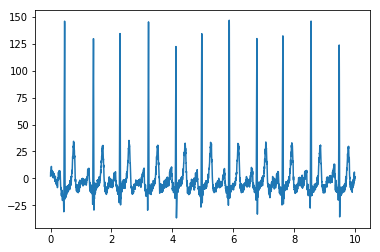

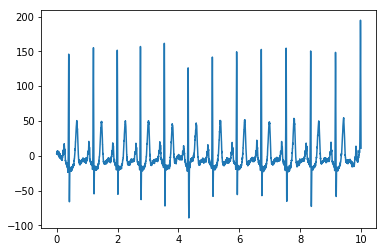

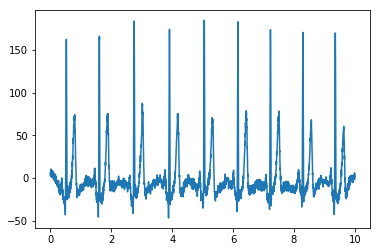

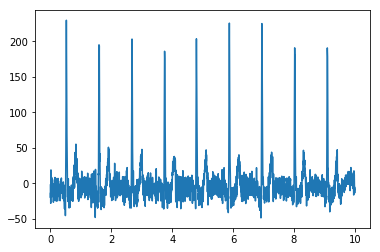

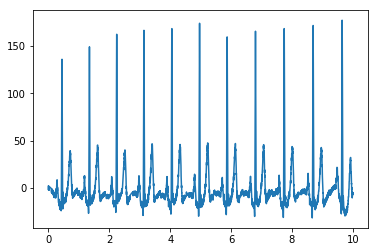

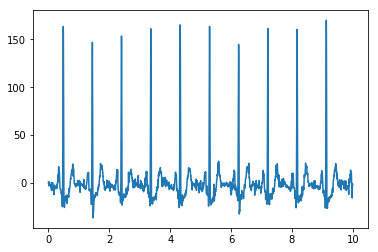

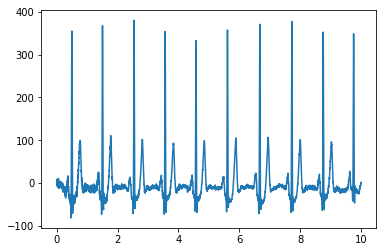

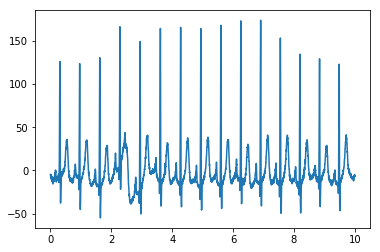

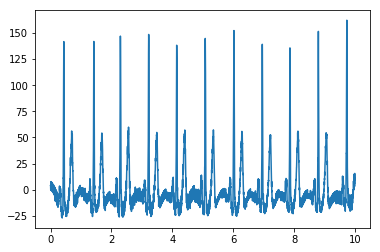

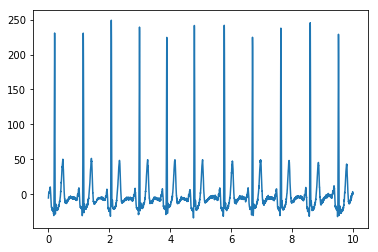

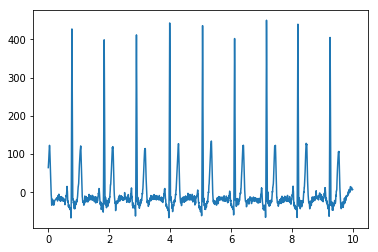

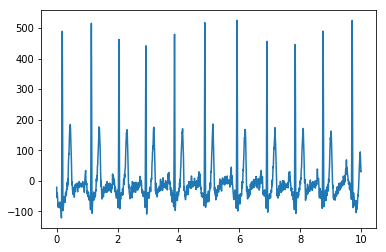

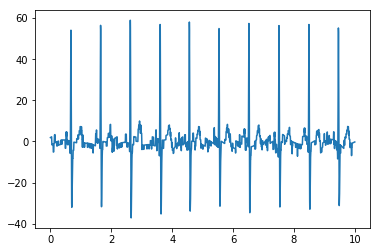

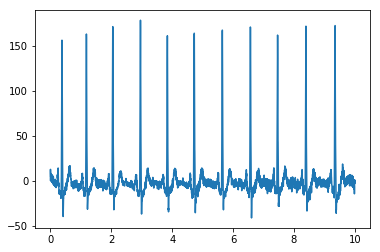

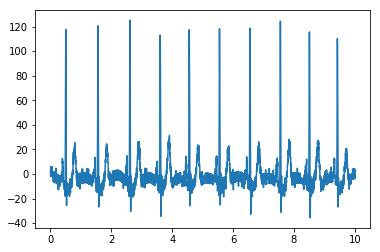

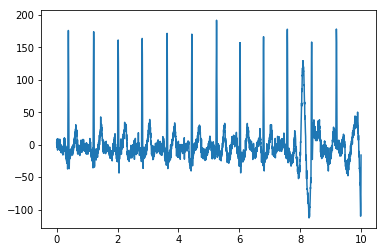

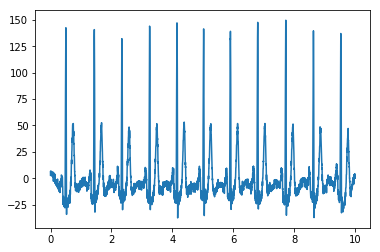

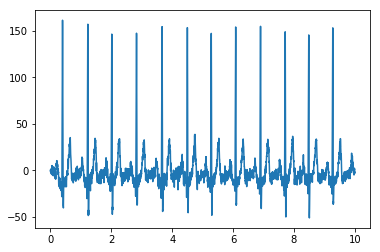

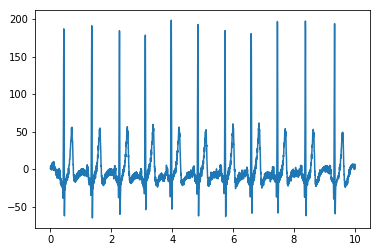

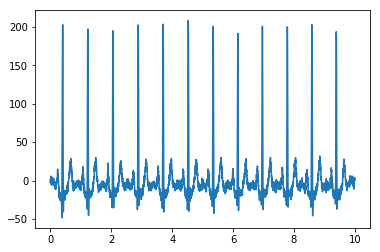

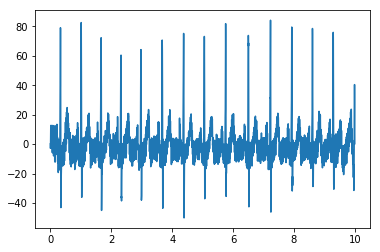

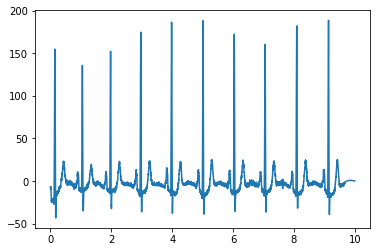

In [110]:
for p in range(30):
    plt.plot(t, filtered_ecg_signals[p, 0, :])
    plt.show()

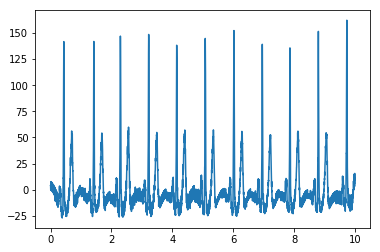

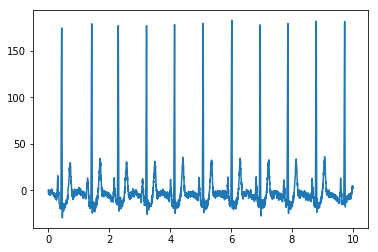

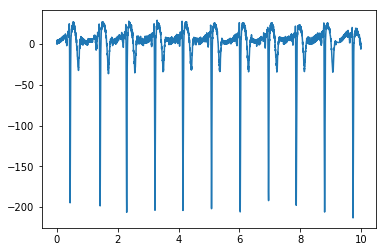

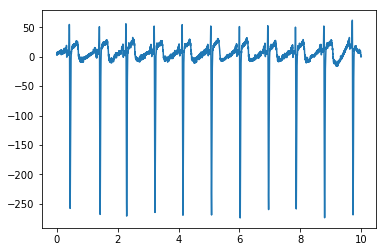

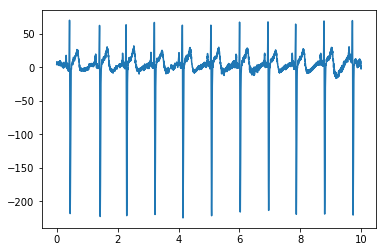

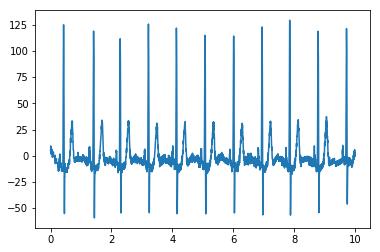

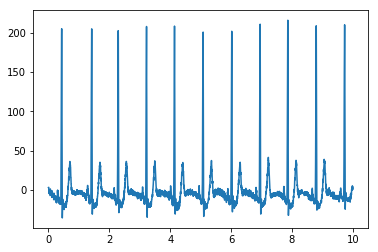

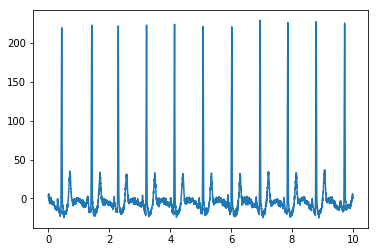

In [130]:
for l in range(8):
    plt.plot(t, filtered_ecg_signals[16,l,:])
    plt.show()

In [133]:
np.median(filtered_ecg_signals[16,5,:])

-4.480084939079722

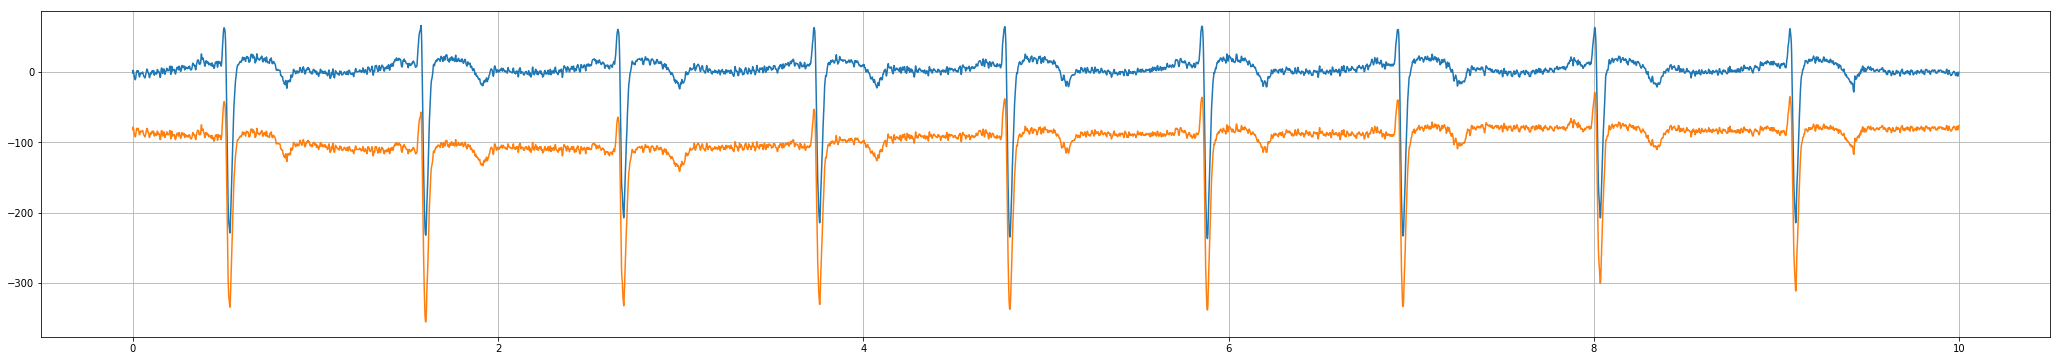

In [98]:
filtered = high_pass_filter(ecg_signals[11,2,:], 5, 1, 500)
plt.figure(figsize=[36,6])
plt.plot(t, filtered)
plt.plot(t, ecg_signals[11,2,:])
plt.grid()
plt.show()

In [136]:
def autocorr(signal):
    return np.correlate(signal, signal, mode='full')

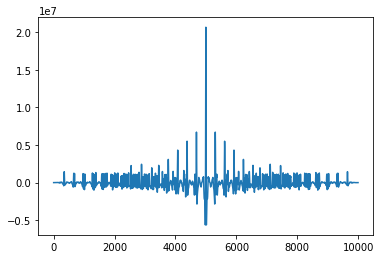

In [138]:
plt.plot(autocorr_signal[0,0,:])